## then we'll gather the relevant data from the curated pairs

In [1]:
# public libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
sc.settings.set_figure_params(dpi=100)

/tmp/ipykernel_13400/54618371.py:2: DtypeWarning: Columns (2,10,11,12,13,14,15,16,18,19,20,21,22,23,28,29,34,35,42,43,44,45,46,47,48,49,50,57,58,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/ssd1/dchen/GNN_PEPTIDE_TCR/data/iedb.receptor_table_export_1692393367.csv', index_col=0)


0.8604170968408011 CDR3a
0.9959104778947852 TRAV
0.9964611007869318 TRAJ
0.9352215110009865 TRBV
0.9359442035469291 TRBJ


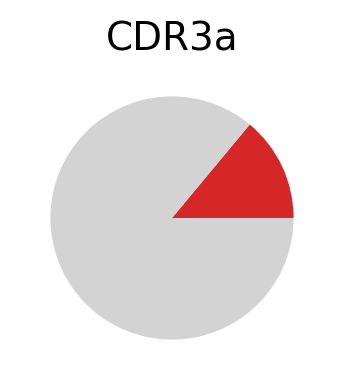

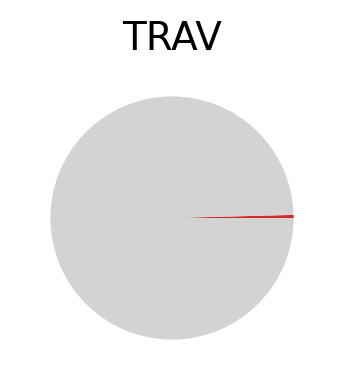

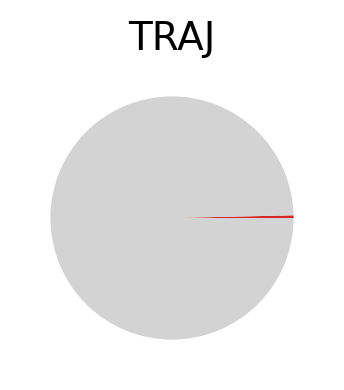

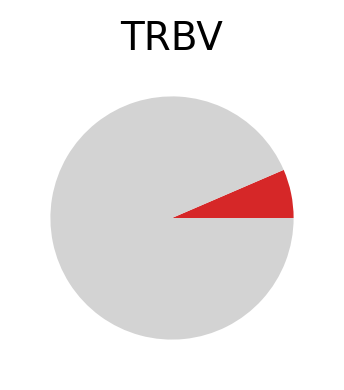

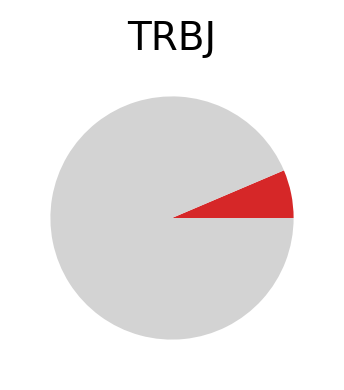

In [84]:
# load in the IEDB data
df = pd.read_csv('/ssd1/dchen/GNN_PEPTIDE_TCR/data/iedb.receptor_table_export_1692393367.csv', index_col=0)
df_iedb = df.reset_index().iloc[:, 1:]
# filter for non NA CDR3bs
df_iedb = df_iedb.loc[df_iedb['Chain 2 - Type'] == 'beta']
df_iedb = df_iedb.dropna(subset=['Chain 2 - CDR3 Curated'])
# get statistics for the other values
no_cdr3a = df_iedb['Chain 1 - Type'].isna().mean()
no_trav = df_iedb['Chain 1 - Calculated V Gene'].isna().mean()
no_traj = df_iedb['Chain 1 - Calculated J Gene'].isna().mean()
no_trbv = df_iedb['Chain 2 - Calculated V Gene'].isna().mean()
no_trbj = df_iedb['Chain 2 - Calculated J Gene'].isna().mean()
# assemble into bar plot
for stat, label in zip([no_cdr3a, no_trav, no_traj, no_trbv, no_trbj],
                       ['CDR3a','TRAV','TRAJ','TRBV','TRBJ']):
    fig, ax = plt.subplots(figsize=[2, 2])
    ax.grid(False)
    ax.pie([1-stat, stat], colors=['tab:red', 'lightgray',])
    ax.set_title(label)
    print(stat, label)

/tmp/ipykernel_13400/105211942.py:2: DtypeWarning: Columns (13,17,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/ssd1/dchen/GNN_PEPTIDE_TCR/data/McPAS-TCR.csv', encoding='windows-1252')


0.6613229116818206 CDR3a
0.6939969160418993 TRAV
0.6841069814430797 TRAJ
0.03363109480512575 TRBV
0.360876269474132 TRBJ


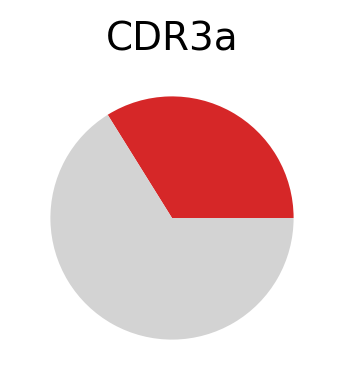

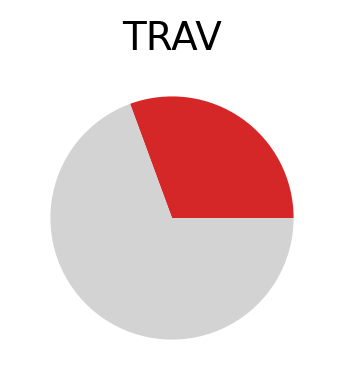

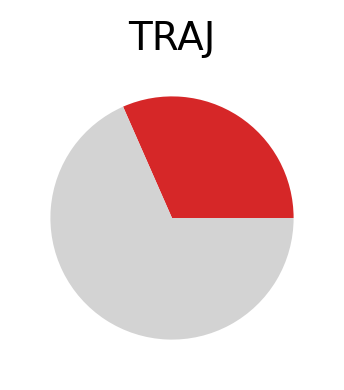

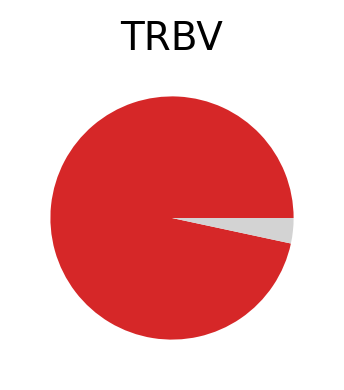

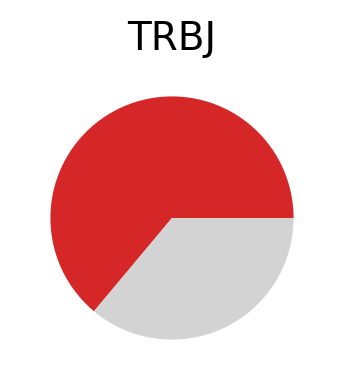

In [74]:
# load in the McPAS data
df = pd.read_csv('/ssd1/dchen/GNN_PEPTIDE_TCR/data/McPAS-TCR.csv', encoding='windows-1252')
df_mcpas = df.copy()
# filter for non NA CDR3bs
df_mcpas = df_mcpas.loc[~df_mcpas['CDR3.beta.aa'].isna()]
# get statistics for the other values
no_cdr3a = df_mcpas['CDR3.alpha.aa'].isna().mean()
no_trav = df_mcpas['TRAV'].isna().mean()
no_traj = df_mcpas['TRAJ'].isna().mean()
no_trbv = df_mcpas['TRBV'].isna().mean()
no_trbj = df_mcpas['TRBJ'].isna().mean()
# assemble into bar plot
for stat, label in zip([no_cdr3a, no_trav, no_traj, no_trbv, no_trbj],
                       ['CDR3a','TRAV','TRAJ','TRBV','TRBJ']):
    fig, ax = plt.subplots(figsize=[2, 2])
    ax.grid(False)
    ax.pie([1-stat, stat], colors=['tab:red', 'lightgray',])
    ax.set_title(label)
    print(stat, label)